# **Step 1. GPU**

In [0]:
from tensorflow.python.client import device_lib 

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"

print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13333556 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14249888281272238833
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10139211357261426698
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13679046726782208624
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14648777152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16256017479935310621
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [1]:
import tensorflow as tf 
tf.__version__

'2.1.0'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import time
start = time.time()
!python3 "gdrive/My Drive/mnist_cnn.py" 
end = time.time()
print(end - start)

python3: can't open file 'gdrive/My Drive/mnist_cnn.py': [Errno 2] No such file or directory
0.20805692672729492



# **Step 2. Implement handwritten recognition in Tensorflow using CNN**

In [82]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import keras
import keras.utils
from keras import utils as np_utils

batch_size = 128 
num_classes = 10 
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
  input_shape = (img_rows, img_cols, 1)

In [84]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape) 
print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Design a model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
input_shape=input_shape)) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

**Q2:** Explain the way that this model is designed. Talk about all the layers and their functionality.

In [86]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0) 
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
375/375 [==============================] - 3s 7ms/step - loss: 0.2837 - accuracy: 0.9140 - val_loss: 0.0647 - val_accuracy: 0.9812
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0985 - accuracy: 0.9708 - val_loss: 0.0510 - val_accuracy: 0.9849
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 0.0433 - val_accuracy: 0.9866
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0419 - val_accuracy: 0.9872
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0414 - val_accuracy: 0.9884
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0366 - val_accuracy: 0.9894
Epoch 

In [0]:
scores = model.evaluate(x_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 1s - loss: 0.0343 - accuracy: 0.9923
Baseline Error: 0.77%
Baseline Accuracy: 99.23%


**Q3:** Design the learning curve and talk about what you see.

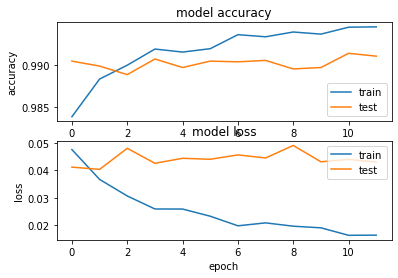

In [0]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **Step 3. Text mining using CNN**

**3.1. Pre-processing**

In [0]:
import pandas as pd

df = pd.read_csv('gdrive/My Drive/amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')

In [0]:
print(df.iloc[0])

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object


**Example**

In [0]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False) 
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'So': 414,
 'there': 1957,
 'is': 1284,
 'no': 1478,
 'way': 2091,
 'for': 1095,
 'me': 1405,
 'to': 1985,
 'plug': 1600,
 'it': 1287,
 'in': 1248,
 'here': 1198,
 'the': 1952,
 'US': 465,
 'unless': 2039,
 'go': 1151,
 'by': 703,
 'converter': 831,
 'Good': 209,
 'case': 728,
 'Excellent': 187,
 'value': 2064,
 'Great': 210,
 'jawbone': 1292,
 'Tied': 453,
 'charger': 748,
 'conversations': 830,
 'lasting': 1323,
 'more': 1442,
 'than': 1949,
 '45': 20,
 'minutes': 1430,
 'MAJOR': 277,
 'PROBLEMS': 333,
 'The': 444,
 'mic': 1422,
 'great': 1161,
 'have': 1186,
 'jiggle': 1293,
 'get': 1138,
 'line': 1349,
 'up': 2045,
 'right': 1733,
 'decent': 877,
 'volume': 2075,
 'If': 235,
 'you': 2163,
 'several': 1793,
 'dozen': 941,
 'or': 1518,
 'hundred': 1225,
 'contacts': 821,
 'then': 1955,
 'imagine': 1240,
 'fun': 1121,
 'of': 1498,
 'sending': 1782,
 'each': 958,
 'them': 1954,
 'one': 1506,
 'are': 597,
 'Razr': 377,
 'owner': 1542,
 'must': 1456,
 'this': 1966,
 'Needless': 302,
 's

In [0]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

**Amazon**

In [0]:
from sklearn.model_selection import train_test_split

sentences = df['sentence'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train) 
X_test = vectorizer.transform(sentences_test) 
X_train

<750x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 6817 stored elements in Compressed Sparse Row format>

In [91]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression() 
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


**normal DNN**

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

input_dim = X_train.shape[1]

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
hist = model.fit(X_train, y_train, 
                 epochs=100, 
   #              validation_split=0.2,
   #              validation_data=(X_val, y_val),
                 validation_data=(X_test, y_test),
                 verbose=1, 
                 batch_size=10) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy: ", accuracy*100)

Epoch 1/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5880 - val_loss: 0.6716 - val_accuracy: 0.6400
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.7867 - val_loss: 0.6222 - val_accuracy: 0.7160
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.9053 - val_loss: 0.5576 - val_accuracy: 0.7600
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.9360 - val_loss: 0.5065 - val_accuracy: 0.7760
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.9613 - val_loss: 0.4696 - val_accuracy: 0.7680
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9827 - val_loss: 0.4466 - val_accuracy: 0.7720
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1855 - accuracy: 0.9867 - val_loss: 0.4381 - val_accuracy: 0.7800
Epoch 8/100
7

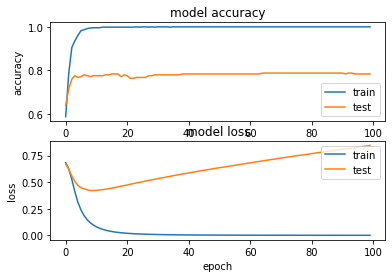

In [94]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Embedded word**

In [95]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train) 
X_test = tokenizer.texts_to_sequences(sentences_test)


vocab_size = len(tokenizer.word_index) + 1

print(sentences_train[3]) 
print(X_train[3])
 

This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!
[7, 5, 1, 9, 8, 92, 11, 676, 2, 59, 101, 10, 677, 3, 32, 2, 71, 225, 5, 449]


In [96]:
for word in ['the', 'all', 'happy']:
      print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 32
happy: 86


In [0]:
from keras.preprocessing.sequence import pad_sequences 
maxlen = 100
 

In [98]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) 
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen) 
print(X_train[0, :])

[  7  24   5  16   4 137 148   6 223 315   2  71 224   8   1 673 111 444
  18 316  11 445   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [0]:
from keras.layers import Dense, Dropout, Flatten

**Model training**

In [171]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import keras
import keras.utils
from keras import utils as np_utils

from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

embedding_dim = 100

model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D())
model.add(Dropout(0.30))
model.add(Flatten())
model.add(layers.Dense(100, activation='relu')) 
model.add(layers.Dense(50, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='sgd', loss=losfun, metrics=['accuracy'])
model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_59 (Embedding)     (None, 100, 100)          157400    
_________________________________________________________________
global_max_pooling1d_57 (Glo (None, 100)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_140 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_141 (Dense)            (None, 1)               

In [172]:
hist = model.fit(X_train, y_train, epochs=100,
                 validation_split=0.2,
                 batch_size=9)

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy: ",accuracy)

Epoch 1/100
67/67 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4933 - val_loss: 0.6927 - val_accuracy: 0.5133
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4533 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5533
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5167 - val_loss: 0.6923 - val_accuracy: 0.6000
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6921 - val_accuracy: 0.5867
Epoch 6/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5267 - val_loss: 0.6919 - val_accuracy: 0.6200
Epoch 7/100
67/67 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5117 - val_loss: 0.6919 - val_accuracy: 0.5200
Epoch 8/100
6

In [123]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

8/8 - 0s - loss: 0.6488 - accuracy: 0.8280
Baseline Error: 17.20%
Baseline Accuracy: 82.80%


5000epoch=81%, 1000epoch=

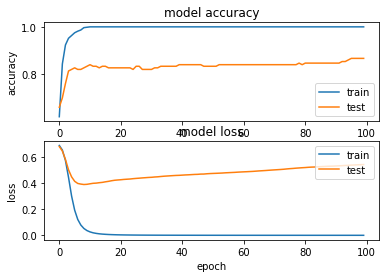

In [16]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()